AIM #1: Loading the dataset and printing basic information 
1. Import the Titanic dataset using pandas
2. Create a Dataframe from the dataset
3. Print the first 10 rows of the dataset
4. Print the last 20 rows of the dataset
5. Print dataset's information
6. Describe the dataset
7. Make sure all the information returned by the different functions are displayed in a single table and not on multiple ines

In [1]:
import pandas as pd

#1.
data = pd.read_csv('titanic.csv')
#2.
df = pd.DataFrame(data)
#3.
print("")
print(df.head(10).to_string())
#4. 
print("")
print(df.tail(20).to_string())
#5.
print("")
print(df.info())  
#6.
print("")
print(df.describe().to_string())


   PassengerId Survived  Pclass                                                 Name     Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked
0            1        0       3                              Braund, Mr. Owen Harris    male  22.0      1      0         A/5 21171     7.25   NaN        S
1            2        1       1  Cumings, Mrs. John Bradley (Florence Briggs Thayer)  female  38.0      1      0          PC 17599  71.2833   C85        C
2            3        1       3                               Heikkinen, Miss. Laina  female  26.0      0      0  STON/O2. 3101282    7.925   NaN        S
3            4        1       1         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1      0            113803     53.1  C123        S
4            5        0       3                             Allen, Mr. William Henry    male  35.0      0      0            373450     8.05   NaN        S
5            6        0       3                                     M

AIM #2: Finding issues (empty, NAs, incorrect value, incorrect format, outliers, etc.) 
1. Find out how many missing values there are in the dataset
2. For the 'Age' column, find the best way to handle the missing values
    2.1. Use an appropriate plot to study the nature of the 'Age' column
    2.2. Figure out what is the best way to calculate the central tendency of the 'Age' column based on the above plot
    2.3. Using the most suitable central tendency measure, fill the missing values in the age column
3. Decide what is the best way to handle the missing values in the 'Cabin' columns
4. Similarly, decide what is the best way to handle the missing values in the 'Embarked' columns
5. Handle the incorrect data under the 'Survived' columns using appropriate measure
6. Handle the incorrectly formatted data under the 'Fare' column


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


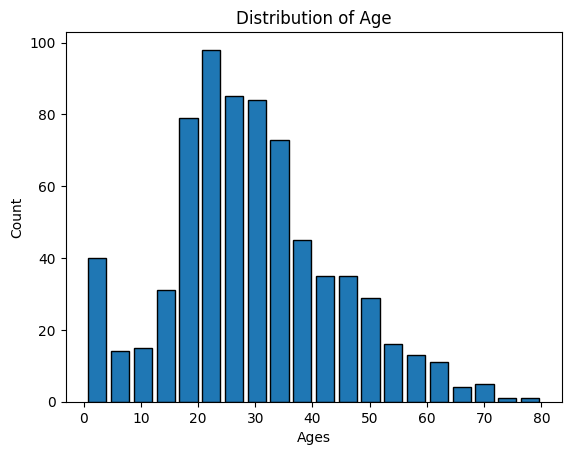

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('titanic.csv')
df = pd.DataFrame(data)

#1. 
print(df.isna().sum())

#2.1.
plt.hist(data['Age'].dropna(), bins=20, edgecolor='black', rwidth=0.8)
plt.xlabel('Ages')
plt.ylabel('Count')
plt.title('Distribution of Age')
plt.show()
#2.2. 
age_median = df['Age'].median()

#2.3. 
df['Age'] = df['Age'].fillna(age_median)
#3. 
df['Cabin'] = df['Cabin'].fillna('Unknown')

#4. Handle missing values in 'Embarked'
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

#5. Handle incorrect data in 'Survived'
df['Survived'] = df['Survived'].apply(lambda x: "1" if x == "1" else ("0" if x == "0" else None))
df['Survived'] = df['Survived'].fillna(df['Survived'].mode()[0])

#6. Handle incorrectly formatted data in 'Fare'
df['Fare'] = pd.to_numeric(df['Fare'], errors='coerce')
# Fill any NaNs that resulted from conversion
df['Fare'] = df['Fare'].fillna(df['Fare'].median())

print(df.isna().sum())

AIM #3: Grouping 
1. Find out the average fare grouped by Pclass
    1.1. Plot the above using a suitable plot
2. Find out the average fare grouped by Sex
    2.1. Plot the above using a suitable plot

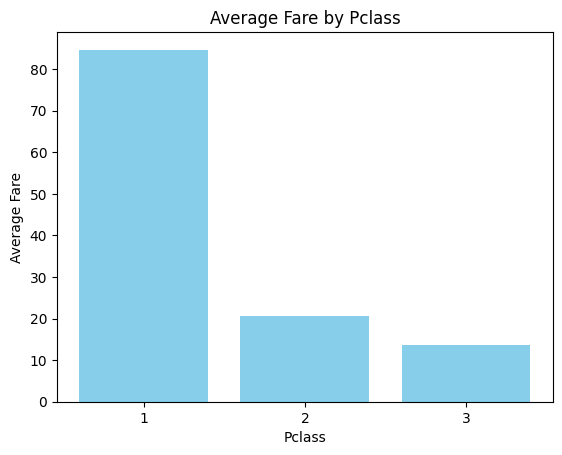

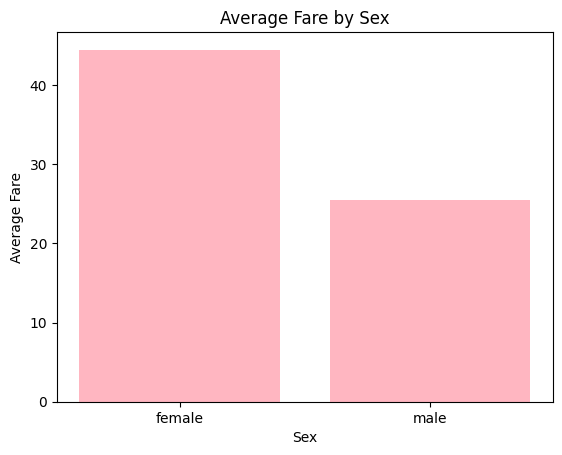

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('titanic.csv')
df = pd.DataFrame(data)

# Keep only the necessary columns
data = df.loc[:, ["Pclass", "Sex", "Fare"]]
#Convert 'Fare' to numeric, coercing errors
data['Fare'] = pd.to_numeric(data['Fare'], errors='coerce')

#1. Group by Pclass and calculate the average Fare, ignoring NaN values
avg_fare_by_pclass = data.groupby(by=["Pclass"])['Fare'].mean()

#1.1. Plot the average fare by Pclass
plt.bar(avg_fare_by_pclass.index, avg_fare_by_pclass.values, color='skyblue')
plt.xlabel('Pclass')
plt.ylabel('Average Fare')
plt.title('Average Fare by Pclass')
plt.xticks(avg_fare_by_pclass.index)
plt.show()

#2. Group by Sex and calculate the average Fare, ignoring NaN values
avg_fare_by_sex = data.groupby(by=["Sex"])['Fare'].mean()

#2.1 Plotting the average fare by Sex
plt.bar(avg_fare_by_sex.index, avg_fare_by_sex.values, color='lightpink')
plt.xlabel('Sex')
plt.ylabel('Average Fare')
plt.title('Average Fare by Sex')
plt.show()


AIM #4: Dataset visualization using pandas

1. Plot the distribution of 'Age' using a suitable plot
2. Plot the distribution of 'Fare' using a suitable plot
3. Plot the distribution of 'Pclass' using a suitable plot
4. Plot the distribution of 'Survived' using a suitable plot
5. Plot the distribution of 'Embarked' using a suitable plot
6. Plot the distribution of 'Fare' grouped by 'Survived'
7. Plot the distribution of 'Fare' grouped by 'Pclass'
8. Plot the distribution of 'Age' grouped by 'Survived'
9. Plot the distribution of 'Age' grouped by 'PClass'
10. Combine the 'SibSp' and 'Parch' and plot its distribution grouped by 'Survived'
11. Combine the 'SibSp' and 'Parch' and plot its distribution grouped by 'Pclass'
12. Plot a distribution between 'Age' and 'Fare' to see if there's any relationship
13. Are there any other possibilities to show relationships?

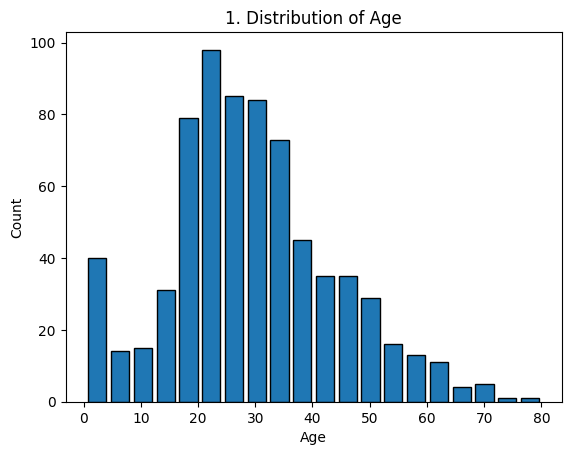

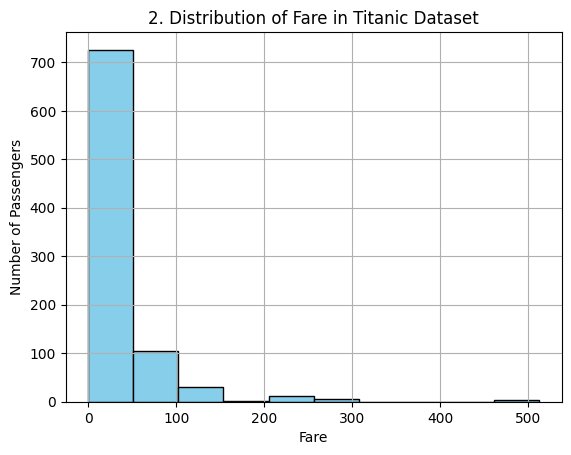

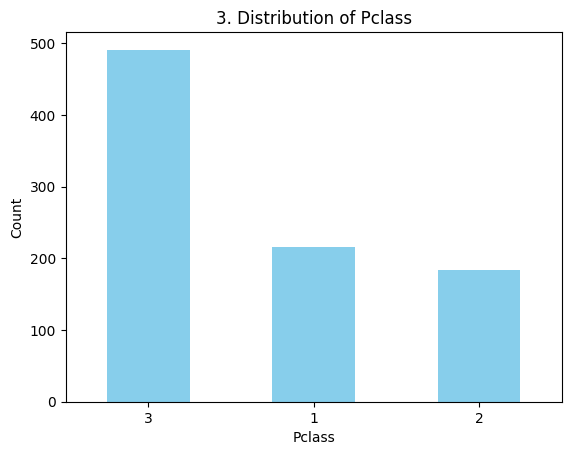

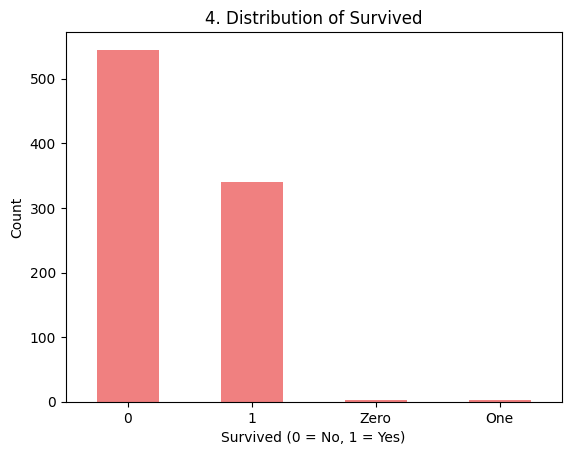

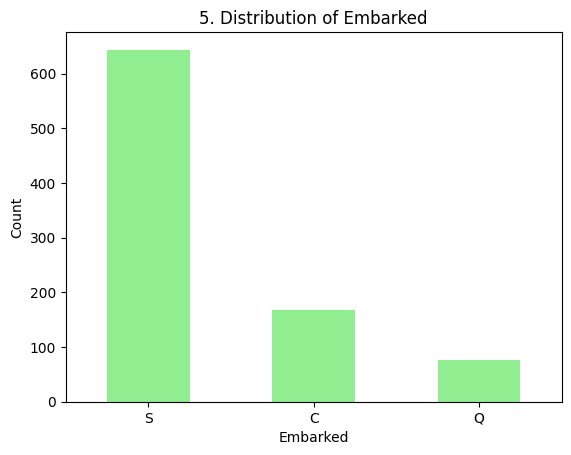

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('titanic.csv')
df = pd.DataFrame(data)

#1. Plot the distribution of 'Age' using a suitable plot
plt.hist(df['Age'].dropna(), bins=20, edgecolor='black', rwidth=0.8)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('1. Distribution of Age')
plt.show()

#2. Plot the distribution of 'Fare' using a suitable plot
df['Fare'] = pd.to_numeric(df['Fare'], errors='coerce')
plt.hist(df['Fare'].dropna(), bins=10, edgecolor='black', color='skyblue')
plt.title('2. Distribution of Fare in Titanic Dataset')
plt.xlabel('Fare')
plt.ylabel('Number of Passengers') 
plt.grid(True)
plt.show()

#3. Plot the distribution of 'Pclass' using a suitable plot
df['Pclass'].dropna().value_counts().plot(kind='bar', color='skyblue')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.title('3. Distribution of Pclass')
plt.xticks(rotation=0)
plt.show()

#4. Plot the distribution of 'Survived' using a suitable plot
df['Survived'].dropna().value_counts().plot(kind='bar', color='lightcoral')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.title('4. Distribution of Survived')
plt.xticks(rotation=0)
plt.show()

#5. Plot the distribution of 'Embarked' using a suitable plot
df['Embarked'].value_counts().plot(kind='bar', color='lightgreen')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.title('5. Distribution of Embarked')
plt.xticks(rotation=0)
plt.show()

C:\Users\Karen\AppData\Local\Temp\ipykernel_12116\2204398460.py:31: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=['Not Survived', 'Survived'])


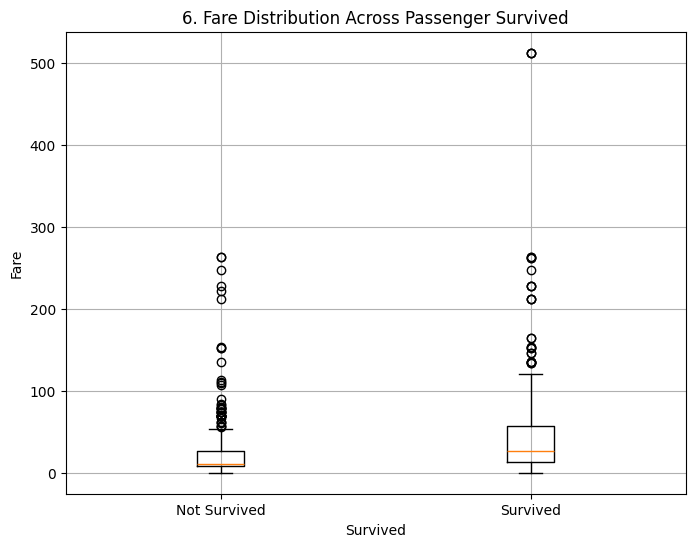

In [5]:
#6. Plot the distribution of 'Fare' grouped by 'Survived'
import matplotlib.pyplot as plt
import csv

# Load Titanic dataset and filter Survived and Fare
sur0_fare = []
sur1_fare = []

with open('titanic.csv', mode='r') as file:
    csv_reader = csv.DictReader(file)
    
    for row in csv_reader:
        if row['Fare'] and row['Survived']:  # Check if 'Fare' and 'Survived' are not missing
            fare = float(row['Fare'].replace('$', '').replace(',', ''))  # Clean the Fare string
            survived = str(row['Survived'])
            
            # Append to the corresponding list based on Survived
            if survived == "0":
                sur0_fare.append(fare)
            elif survived == "1":
                sur1_fare.append(fare)
            elif survived == "Zero":
                sur0_fare.append(fare)
            elif survived == "One":
                sur1_fare.append(fare)    

# Prepare the data for the box plot
data = [sur0_fare, sur1_fare]
plt.figure(figsize=(8, 6))
# Create the box plot using matplotlib
plt.boxplot(data, labels=['Not Survived', 'Survived'])
plt.title('6. Fare Distribution Across Passenger Survived')
plt.xlabel('Survived')
plt.ylabel('Fare')
plt.grid(True)
plt.show()


C:\Users\Karen\AppData\Local\Temp\ipykernel_12116\391799600.py:30: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=['1st Class', '2nd Class', '3rd Class'])


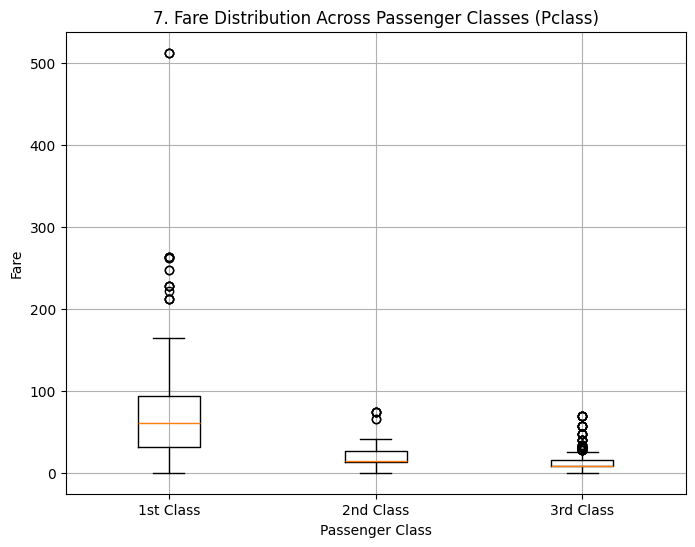

In [6]:
#7. Plot the distribution of 'Fare' grouped by 'Pclass'
import matplotlib.pyplot as plt
import csv

# Load Titanic dataset and filter Pclass and Fare
pclass_1_fare = []
pclass_2_fare = []
pclass_3_fare = []

with open('titanic.csv', mode='r') as file:
    csv_reader = csv.DictReader(file)
    
    for row in csv_reader:
        if row['Fare'] and row['Pclass']:  # Check if 'Fare' and 'Pclass' are not missing
            fare = float(row['Fare'].replace('$', '').replace(',', ''))  # Clean the Fare string
            pclass = int(row['Pclass'])
            
            # Append to the corresponding list based on Pclass
            if pclass == 1:
                pclass_1_fare.append(fare)
            elif pclass == 2:
                pclass_2_fare.append(fare)
            elif pclass == 3:
                pclass_3_fare.append(fare)

# Prepare the data for the box plot
data = [pclass_1_fare, pclass_2_fare, pclass_3_fare]
plt.figure(figsize=(8, 6))
# Create the box plot using matplotlib
plt.boxplot(data, labels=['1st Class', '2nd Class', '3rd Class'])
plt.title('7. Fare Distribution Across Passenger Classes (Pclass)')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.grid(True)
plt.show()


C:\Users\Karen\AppData\Local\Temp\ipykernel_12116\2873138861.py:31: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=['Not Survived', 'Survived'])


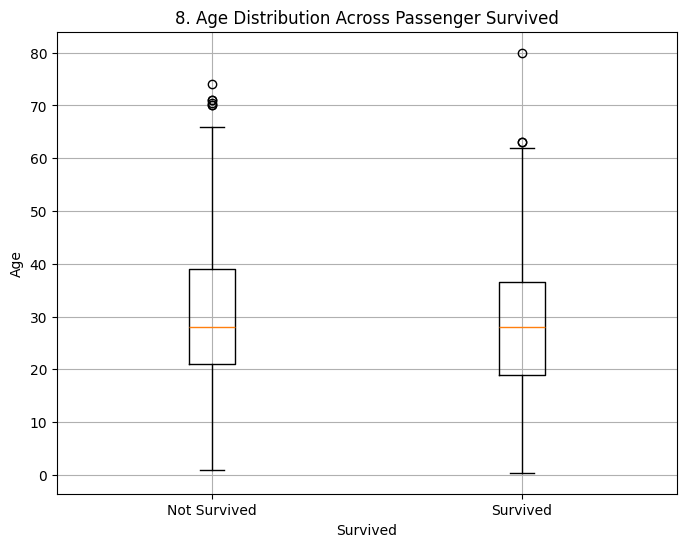

In [7]:
import matplotlib.pyplot as plt
import csv

#8. Plot the distribution of 'Age' grouped by 'Survived'
# Load Titanic dataset and filter Survived and Age
sur0_age = []
sur1_age = []

with open('titanic.csv', mode='r') as file:
    csv_reader = csv.DictReader(file)
    
    for row in csv_reader:
        if row['Age'] and row['Survived']:  # Check if 'Fare' and 'Age' are not missing
            age = float(row['Age'].replace('$', '').replace(',', ''))  # Clean the Fare string
            survived = str(row['Survived'])
            
            # Append to the corresponding list based on Survived
            if survived == "0":
                sur0_age.append(age)
            elif survived == "1":
                sur1_age.append(age)
            elif survived == "Zero":
                sur0_age.append(fare)
            elif survived == "One":
                sur1_age.append(age)    

# Prepare the data for the box plot
data = [sur0_age, sur1_age]
plt.figure(figsize=(8, 6))
# Create the box plot using matplotlib
plt.boxplot(data, labels=['Not Survived', 'Survived'])
plt.title('8. Age Distribution Across Passenger Survived')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.grid(True)
plt.show()

C:\Users\Karen\AppData\Local\Temp\ipykernel_12116\2433071440.py:31: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=['1st Class', '2nd Class', '3rd Class'])


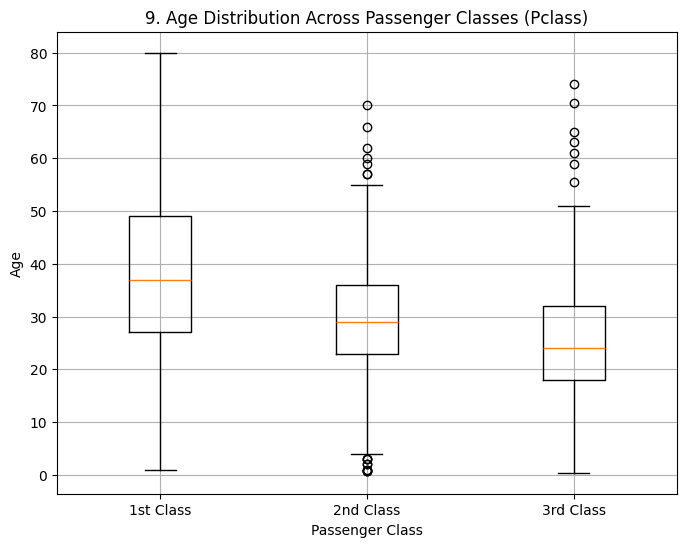

In [8]:
#9. Plot the distribution of 'Age' grouped by 'PClass'
import matplotlib.pyplot as plt
import csv

# Load Titanic dataset and filter Pclass and Age
pclass_1_age = []
pclass_2_age = []
pclass_3_age = []

with open('titanic.csv', mode='r') as file:
    csv_reader = csv.DictReader(file)
    
    for row in csv_reader:
        if row['Age']:  # Check if 'Age' is not missing
            age = float(row['Age'])
            pclass = int(row['Pclass'])
            
            # Append to the corresponding list based on Pclass
            if pclass == 1:
                pclass_1_age.append(age)
            elif pclass == 2:
                pclass_2_age.append(age)
            elif pclass == 3:
                pclass_3_age.append(age)

# Prepare the data for the box plot
data = [pclass_1_age, pclass_2_age, pclass_3_age]

# Create the box plot using matplotlib
plt.figure(figsize=(8, 6))
plt.boxplot(data, labels=['1st Class', '2nd Class', '3rd Class'])
plt.title('9. Age Distribution Across Passenger Classes (Pclass)')
plt.xlabel('Passenger Class')
plt.ylabel('Age')
plt.grid(True)
plt.show()


<Figure size 640x480 with 0 Axes>

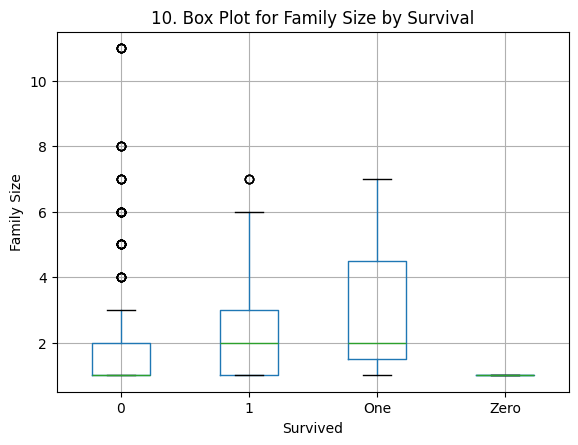

In [9]:
#10. Combine the 'SibSp' and 'Parch' and plot its distribution grouped by 'Survived'
import pandas as pd
import matplotlib.pyplot as plt

# Load the Titanic dataset
df = pd.read_csv('titanic.csv')

# Box plot for Family Size grouped by Survived
plt.figure()
df['Family Size'] = df['SibSp'] + df['Parch'] + 1
df.boxplot(column='Family Size', by='Survived')
plt.title("10. Box Plot for Family Size by Survival")
plt.suptitle("")  # Remove the default title to avoid clutter
plt.xlabel("Survived")
plt.ylabel("Family Size")
plt.show()


<Figure size 640x480 with 0 Axes>

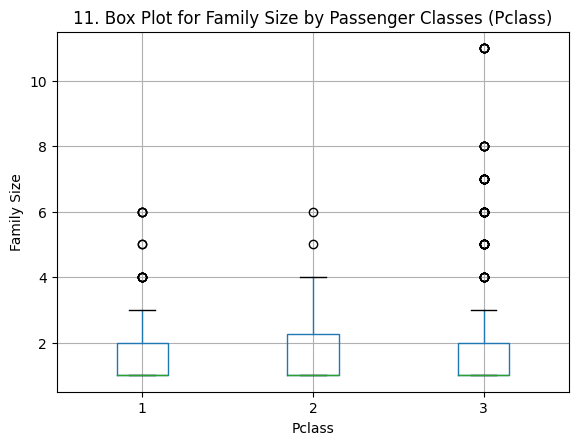

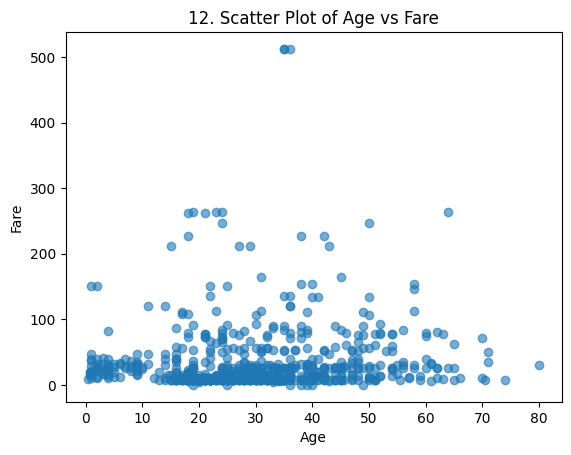

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('titanic.csv')

#11. Combine the 'SibSp' and 'Parch' and plot its distribution grouped by 'Pclass'
plt.figure()
df['Family Size'] = df['SibSp'] + df['Parch'] + 1
df.boxplot(column='Family Size', by='Pclass')
plt.title("11. Box Plot for Family Size by Passenger Classes (Pclass)")
plt.suptitle("")  # Remove the default title to avoid clutter
plt.xlabel("Pclass")
plt.ylabel("Family Size")
plt.show()

#12. Plot a distribution between 'Age' and 'Fare' to see if there's any relationship
df['Fare'] = pd.to_numeric(df['Fare'], errors='coerce')

plt.figure()
pd.cut(df['Fare'], bins=[0, 10, 20, 50, 100, 200, 500], right=False)
plt.scatter(df['Age'], df['Fare'], alpha=0.6)
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('12. Scatter Plot of Age vs Fare')
plt.show()

AIM #5: Correlation

1. Generate a correlation matrix for the entire dataset
2. Find correlation between 'Age' and 'Fare'
3. What other possible correlations can be found in the dataset?

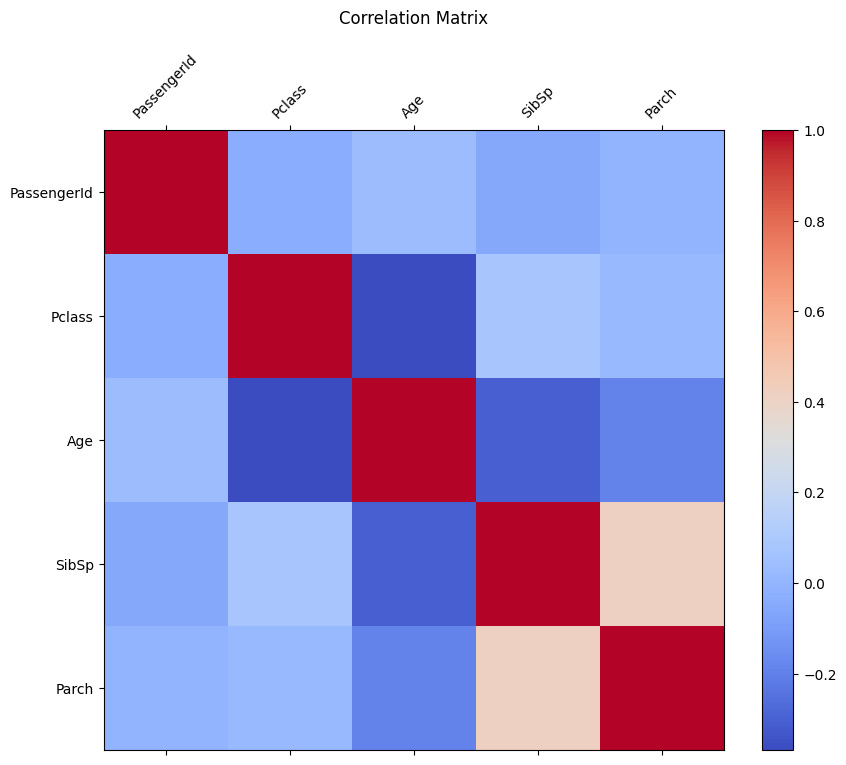

2. 
Correlation between Age and Fare: 0.10
3. 
Correlation between Pclass and Survived: -0.34
Correlation between SibSp and Parch: 0.41
Correlation between Age and Survived: -0.08


In [11]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('titanic.csv')
df = pd.DataFrame(data)

# 1. 
numeric_df = df.select_dtypes(include=['number'])  # Select only numeric columns
correlation_matrix = numeric_df.corr()
 
# correlation matrix
plt.figure(figsize=(10, 8))
plt.matshow(correlation_matrix, fignum=1, cmap='coolwarm')
plt.colorbar()
plt.title('Correlation Matrix', pad=20)

plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.show()

#2. 
df['Survived'] = df['Survived'].replace({"Zero": "0", "One": "1"})
df['Survived'] = pd.to_numeric(df['Survived'], errors='coerce')

df['Fare'] = pd.to_numeric(df['Fare'], errors='coerce')
age_fare_correlation = df['Age'].corr(df['Fare'])
print("2. ")
print(f"Correlation between Age and Fare: {age_fare_correlation:.2f}")

#3. 
pclass_survived_correlation = df['Pclass'].corr(df['Survived'])
sibsp_parch_correlation = df['SibSp'].corr(df['Parch'])
age_survived_correlation = df['Age'].corr(df['Survived'])
print("3. ")
print(f"Correlation between Pclass and Survived: {pclass_survived_correlation:.2f}")
print(f"Correlation between SibSp and Parch: {sibsp_parch_correlation:.2f}")
print(f"Correlation between Age and Survived: {age_survived_correlation:.2f}")
